# Práctica 4. Regresión Lineal (II) - Aprendizaje Automático

## Descenso según el gradiente

Sklearn implementa el descenso según el gradiente la clase SGDRegressor. Se le debe indicar que función minimizar, en nuestro caso el error cuadrático (loss=squared_error), si se incluye regularización (penalty=None), el learning rate que su valor se indica en eta0 y puede ser constante o variable, en nuestro caso constante (learning_rate='constant'), max_iter es el número máximo de iteraciones. 

Si el aprendizaje se realiza con el método fit, se realizan las iteraciones hasta converger. Sin embargo, se puede hacer paso a paso mediante partial_fit, de esta forma cada ejecución realiza una única época. Explicar que época es aplicar la corrección con todas las muestras del conjunto de aprendizaje.

La clase posee el método score que devuelve el coeficiente de determinación $R^2$.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor, LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [3]:
datos = pd.read_csv('data/tiempos-minutos.csv', sep=';')
# datos = pd.read_csv('datos-hormigon.csv', sep=';', decimal=',')

datos.head()

,P1,P2,P3,P4,P5,P6,T_Final
0,172,254,356,385,514,636,703
1,163,253,371,408,556,674,738
2,188,279,389,419,580,728,803
3,195,288,397,425,579,729,800
4,195,296,415,453,619,766,863


Comprobar si existen valores perdidos

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   P1       268 non-null    int64
 1   P2       268 non-null    int64
 2   P3       268 non-null    int64
 3   P4       268 non-null    int64
 4   P5       268 non-null    int64
 5   P6       268 non-null    int64
 6   T_Final  268 non-null    int64
dtypes: int64(7)
memory usage: 14.8 KB


Ejecutar ejemplo utilizando fit. Configurar con learning_rate constante, sin regularización. IMPORTANTE: comprobar el resultado sin escalar y escalando los valores. Explicar porque sin escalar se obtienen valores tan altos.

Probar con valores diferentes de verbose y varios valores de max_iter para comprobar el warning que da si se ponen pocas iteraciones. P.e. max_iter=5

In [5]:
regr = SGDRegressor(
    loss='squared_error', 
    penalty=None, 
    max_iter=5, 
    learning_rate='constant', 
    eta0=0.001, 
    verbose=0
)

X = datos.iloc[:,:-1].values
y = datos.iloc[:,-1].values

regr.fit(X,y)
r2 = regr.score(X,y)
print(f'R2: {r2}')
print(f'N. iteraciones: {regr.n_iter_}')
# print(f'Coeficientes: {regr.coef_}')
y_pred = regr.predict(X)
print(f'score: {r2_score(y, y_pred)}')

R2: -8.071769726521344e+24
N. iteraciones: 5
score: -8.071769726521344e+24


/home/miguel/miniconda3/envs/aa1/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Resultados con escalado

In [6]:
regr = SGDRegressor(loss='squared_error', penalty=None, max_iter=100, learning_rate='constant', eta0=0.001, verbose=0)

X = datos.iloc[:,:-1].values
y = datos.iloc[:,-1].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1,1))
y = y.reshape(-1)

regr.fit(X,y)
r2 = regr.score(X,y)
print(f'R2: {r2}')
print(f'N. iteraciones: {regr.n_iter_}')
y_pred = regr.predict(X)
print(f'score: {r2_score(y, y_pred)}')

R2: 0.8387305230436457
N. iteraciones: 10
score: 0.8387305230436457


Ejecutar con el método partial_fit indicando el número de épocas

In [7]:
regr = SGDRegressor(loss='squared_error', penalty=None, max_iter=100, learning_rate='constant', eta0=0.001, verbose=0)

X = datos.iloc[:,:-1].values
y = datos.iloc[:,-1].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1,1))
y = y.reshape(-1)

n_epocas = 50
for i in range(n_epocas):
    regr.partial_fit(X,y)
    r2 = regr.score(X,y)
    print(f'R2: {r2}')
    # print(f'Coeficientes: {regr.coef_}')


R2: -0.9110649966725457
R2: 0.25505162139952475
R2: 0.6239557246404757
R2: 0.7444031623431859
R2: 0.7885362474740425
R2: 0.807395559056465
R2: 0.81836429200427
R2: 0.8262059170328253
R2: 0.8331778737658652
R2: 0.8394714653701918
R2: 0.8453841050710972
R2: 0.8510514213944891
R2: 0.8563780971136239
R2: 0.8614041846598072
R2: 0.86619181186808
R2: 0.87073767116596
R2: 0.8750439950699309
R2: 0.8791271548961395
R2: 0.8829953160266447
R2: 0.8866863029919283
R2: 0.8901785041039878
R2: 0.8934902314150197
R2: 0.8966370239821014
R2: 0.8996112251099972
R2: 0.9024449022337068
R2: 0.90513143635016
R2: 0.9076888016160184
R2: 0.9101138454297024
R2: 0.9124080268210754
R2: 0.9145906474297282
R2: 0.9166672757927318
R2: 0.9186320629363584
R2: 0.9205000411219639
R2: 0.9222743507840524
R2: 0.9239580511491986
R2: 0.9255488796860982
R2: 0.9270783217115616
R2: 0.9285242626364547
R2: 0.9298966338451986
R2: 0.931201869657036
R2: 0.9324407202558339
R2: 0.9336155702898344
R2: 0.934737728857274
R2: 0.93580254597824

**Ejercicio de clase**

Mostrar gráficamente el valor de $R^2$ en una gráfica. Probar valores para eta0 desde 1 hasta valores pequeños y observar que ocurre. Con el average se puede cambiar el comportamiento de stochastic a batch. Si average=True, los coeficientes se modifican al final de la época como el promedio del cambio de todos las correcciones.

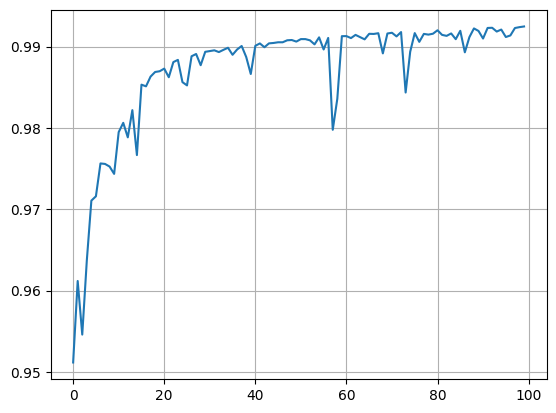

In [8]:
regr = SGDRegressor(loss='squared_error', penalty=None, max_iter=100, learning_rate='constant', eta0=0.1, verbose=0, average=False)

X = datos.iloc[:,:-1].values
y = datos.iloc[:,-1].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1,1))
y = y.reshape(-1)

n_epocas = 100
v = np.zeros(n_epocas)
for i in range(n_epocas):
    regr.partial_fit(X,y)
    r2 = regr.score(X,y)
    v[i] = r2

plt.plot(v)
plt.grid()
plt.show()

## Análisis dependencia lineal 

Para evaluar la bondad de los métodos de regresión lineal se puede utilizar el coeficiente de determinación $R^2$, que muestra la proporción del total de la variabilidad explicada por el modelo lineal. Esto se consigue comparando el resultado de utilizar el modelo lineal con una estimación basada en la media. Por tanto, cuanto más próxima sea la estimación al valor real y más alejada esté del valor medio, mejor será el modelo lineal obtenido. La expresión del coeficiente de determinación $R^2$ es la siguiente:
\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^m(y_i - \hat{y}_i)^2}{\sum_{i=1}^m(y_i -\bar{y})^2}
\end{equation}
donde $y_i$ e $\hat{y}_i$ son los valores real y estimado, respectivamente, para la muestra i-ésima, y $\bar{y}$ es el valor medio de la variable respuesta.

De forma visual también se puede estimar la calidad del modelo de regresión lineal con respecto a una característica utilizando un diagrama de dispersión con la recta de regresión. Este diagrama es un gráfico bidimensional donde se muestran en forma de puntos los pares valor de la variable respuesta, valor de la característica, y de forma superpuesta la recta de regresión obtenida por el modelo. En la figura \ref{fig:diagrama_dispersion} se puede observar un ejemplo de este tipo de diagramas donde se muestra la variable respuesta T\_Final con respecto a la característica P1 del conjunto de datos utilizado en la práctica \ref{ch:regresion}.

**Ejercicio de clase**

Dibujar la recta de regresión y los puntos para todas las variables mostrando el valor de $R^2$.


In [9]:
from sklearn.metrics import r2_score
import numpy as np

(268, 6)
R2 para columna P1: 0.99


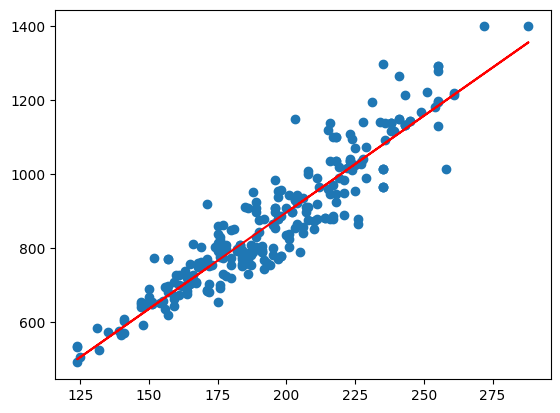

R2 para columna P2: 0.99


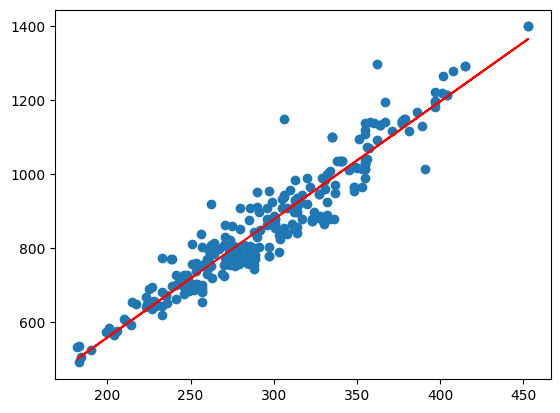

R2 para columna P3: 0.99


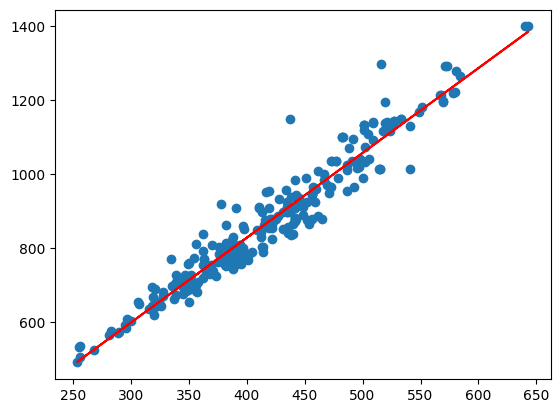

R2 para columna P4: 0.99


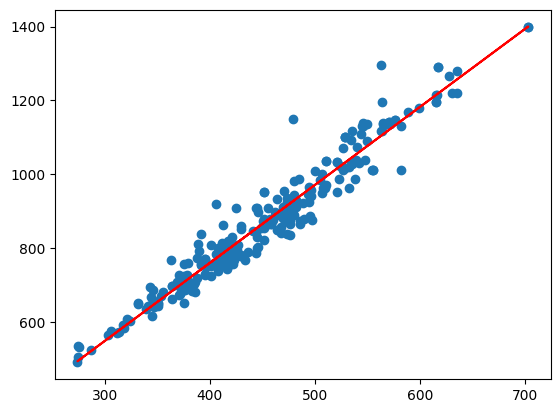

R2 para columna P5: 0.99


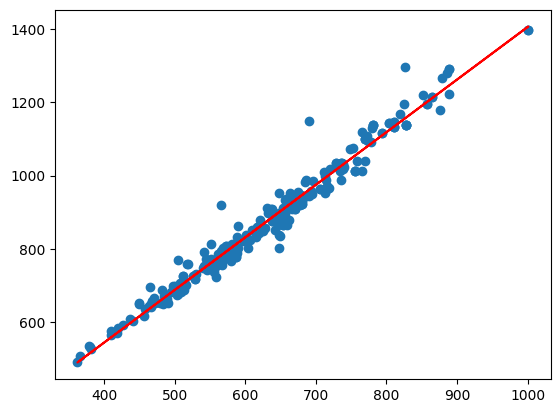

R2 para columna P6: 0.99


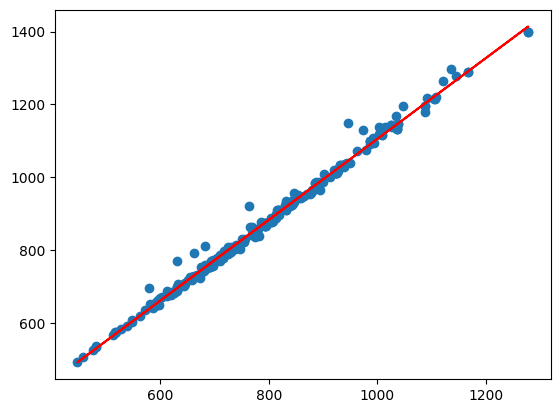

In [11]:
datos = pd.read_csv('data/tiempos-minutos.csv', sep=';')
X = datos.iloc[:,:-1].values
y = datos.iloc[:,-1].values
print(X.shape)
variables = datos.columns
regr = LinearRegression()
for col in range(X.shape[1]):
    X1 = X[:,col].reshape(-1,1)
    # y_train1 = y_train

    regr.fit(X1, y)

    print(f'R2 para columna {variables[col]}: {r2:.2f}')

    recta = regr.coef_ * X1 + regr.intercept_
    plt.plot(X1, recta, 'r')
    plt.scatter(X1, y)
    plt.show()

## Ordenar por relevancia

Utilizar el coeficiente de determinación o el valor del peso asociado a cada variable para medir su importancia. De esta forma se puede ordenar las características en función de ese valor y no se necesario incluir todas en la estimación sino solo las más "importantes"

## Regularización

De acuerdo a la función de pérdida expresada en la ecuación (\ref{eq:funcion_coste}), su minimización implica encontrar un conjunto de pesos de forma que la diferencia entre el valor estimado, $\hat{y}_i$ y el valor real $y_i$ sea lo más pequeña posible. A priori existen muchos conjuntos de pesos que hacen mínima la función de pérdida, sin embargo se puede preferir conjuntos de pesos que posean una determinada característica frente a otros. Un caso puede ser cuando se busca un conjunto de pesos en los que no haya valores muy grandes para algunos de ellos de forma que se reduzcan proporcionalmente todos pero sin llegar a ser cero. Para ello, se introduce a la función de pérdida un término de regularización denominado $L2$, o regularización \emph{Ridge},

\begin{equation}
J_w = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i - y_i)^2 + \lambda \sum_{j=0}^{n} w_i^2
\end{equation}

En la función de pérdida (\ref{eq:ridge}) el parámetro $\lambda$ controla el efecto de la regularización. Para el caso de $\lambda=0$ se tiene la función de perdida inicial, y a medida que se le da valores mayores, el efecto de la regularización es más fuerte.

Otro caso opuesto al anterior, es cuando se desea que la estimación dependa de pocas variables haciendo que el peso de algunas de ellas sea muy bajo y de otras bastante alto. Esto se consigue con la regularización $L1$, o regularización \emph{Lasso}, que añade a la función de perdida (\ref{eq:funcion_coste}) un término que es la suma en valor absoluto de los coeficientes,

\begin{equation}
J_w = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i - y_i)^2 + \lambda \sum_{j=0}^{n} |w_i|
\end{equation}

Al igual que en la regularización $L2$, el parámetro $\lambda$ controla el efecto de la regularización. A medida que aumenta, los coeficientes tienen valores más dispersos pudiendo llegar en algunos casos a que determinados coeficientes sean casi cero.


In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt

In [14]:
datos = pd.read_csv('data/tiempos-minutos.csv', sep=';')
datos.head()

,P1,P2,P3,P4,P5,P6,T_Final
0,172,254,356,385,514,636,703
1,163,253,371,408,556,674,738
2,188,279,389,419,580,728,803
3,195,288,397,425,579,729,800
4,195,296,415,453,619,766,863


In [15]:
X = datos.iloc[:,:-1].values
y = datos.iloc[:,-1].values

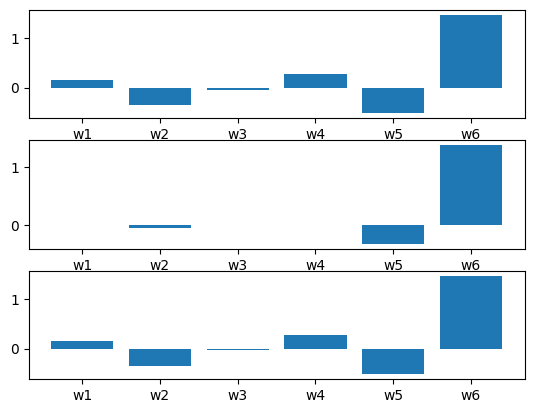

In [16]:
regr = LinearRegression()
regr.fit(X,y)
coef_lr = regr.coef_

regr = Lasso(alpha=10)
regr.fit(X,y)
coef_lasso = regr.coef_

regr = Ridge(alpha=10)
regr.fit(X,y)
coef_ridge = regr.coef_

etiquetas = ['w'+str(i+1) for i in range(len(coef_lr))]

plt.subplot(3,1,1)
plt.bar(etiquetas, coef_lr)

plt.subplot(3,1,2)
plt.bar(etiquetas, coef_lasso)

plt.subplot(3,1,3)
plt.bar(etiquetas, coef_ridge)

plt.show()

**Ejercicio de clase**

Probar con diferentes valores de $lambda$ y mostrar el resultado gráficamente